In [13]:
from PIL import Image
import numpy as np
import pandas as pd
from webcolors import name_to_rgb, rgb_to_name
from math import sqrt
import matplotlib.pyplot as plt

# load the image
image = Image.open('reconstructed_images/original_3.jpg')

# convert image to numpy array
data = np.asarray(image)

COLORS_1 = (
    (255, 255, 0), # yellow
    (128, 0, 128), # purple
    (255, 192, 203), # pink
    (255, 0, 0), # red
    (0, 0, 0), #black
    (0, 0, 255), # blue
    (0, 255, 0), # lime
    (0, 128, 0), # green
)


def closest_color(rgb, COLORS):
    r, g, b = rgb
    color_diffs = []
    for color in COLORS:
        cr, cg, cb = color
        color_diff = sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]


get_colors = data.reshape(1, 75*75,3)[0]
get_rgb_colors_as_tuple = [tuple(i) for i in get_colors]
get_closest_rgb_color = [closest_color(i, COLORS=COLORS_1) for i in get_rgb_colors_as_tuple]
get_color_names = [rgb_to_name(i) for i in get_closest_rgb_color]

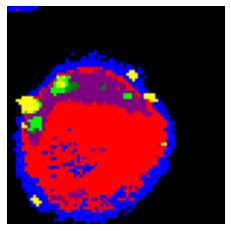

In [14]:
test_image = np.array((get_closest_rgb_color)).reshape((75,75,3))
plt.figure()
plt.axis('off')
plt.imshow(test_image)

In [15]:
label_color_map = {
    'nanoplatform': 'yellow', # yellow
    'organelles': 'purple', # purple
    'lysosome': 'pink', # pink
    'intracellular_matrix': 'red', # red
    'PBS': 'black', # black
    'cell_membrane': 'blue', # blue
    'nanoplatform_lysosomes_1': 'lime', # lime
    'nanoplatform_lysosomes_2': 'green', # green
 }

label_code_map = {
    'nanoplatform': 0, # yellow
    'organelles': 1, # purple
    'lysosome': 2, # pink
    'intracellular_matrix': 3, # red
    'PBS': 4, # black
    'cell_membrane': 5, # blue
    'nanoplatform_lysosomes_1': 6, # lime
    'nanoplatform_lysosomes_2': 7, # green
 }

color_map = {
    'yellow': np.array([255, 255, 0]), # yellow
    'purple': np.array([128, 0, 128]), # purple
    'pink': np.array([255, 192, 203]), # pink
    'red': np.array([255, 0, 0]), # red
    'black': np.array([0, 0, 0]), # black
    'blue': np.array([0, 0, 255]), # blue
    'lime': np.array([0, 255, 0]), # lime
    'green': np.array([0, 128, 0]), # green
 }

In [16]:
df = pd.DataFrame(data=get_color_names, columns=['color'])
df['rgb_code'] = df['color'].map(color_map)
df['label'] = df['color'].map({y: x for x, y in label_color_map.items()})
df['label_code'] = df['label'].map(label_code_map)


In [17]:
df.head()

,color,rgb_code,label,label_code
0,blue,"[0, 0, 255]",cell_membrane,5
1,blue,"[0, 0, 255]",cell_membrane,5
2,blue,"[0, 0, 255]",cell_membrane,5
3,blue,"[0, 0, 255]",cell_membrane,5
4,blue,"[0, 0, 255]",cell_membrane,5


In [18]:
df[['label', 'label_code', 'color', 'rgb_code']].to_csv('reconstructed_images/original_3.csv', index=False)
df[['label', 'label_code', 'color', 'rgb_code']]

,label,label_code,color,rgb_code
0,cell_membrane,5,blue,"[0, 0, 255]"
1,cell_membrane,5,blue,"[0, 0, 255]"
2,cell_membrane,5,blue,"[0, 0, 255]"
3,cell_membrane,5,blue,"[0, 0, 255]"
4,cell_membrane,5,blue,"[0, 0, 255]"
...,...,...,...,...
5620,PBS,4,black,"[0, 0, 0]"
5621,PBS,4,black,"[0, 0, 0]"
5622,PBS,4,black,"[0, 0, 0]"
5623,PBS,4,black,"[0, 0, 0]"
